****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Notes:
###  To conserve memory, this notebook reuses names and is meant to be executed all at once (Cell - Run All)

## Imports

In [1]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

## Load data

In [3]:
#preprocessing - read in json dataset for all exercises

#read in entire json dataset as a list
data = json.load((open('data/world_bank_projects.json')))

## Exercise #1: 
### Find the 10 countries with most projects


In [4]:
#extract necessary fields from data list for exercise 1
df = json_normalize(data, '_id', [['project_name'],['countrycode'],['countryname']])

#total projects by country name and sort descending
df = df.groupby(by=['countryname']).agg({'project_name':pd.Series.nunique}).sort_values('project_name', ascending=False).head(10)

#rename column for better / easier presentation
df.rename(index={1:'Country'},  columns={'project_name':'Project Count'}, inplace=True)
df.rename_axis('Country', inplace=True)

#show the 10 countries wiht the most projects
df

,Project Count
Country,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


Text(0.5, 1.0, '10 Countries with the Most Projects')

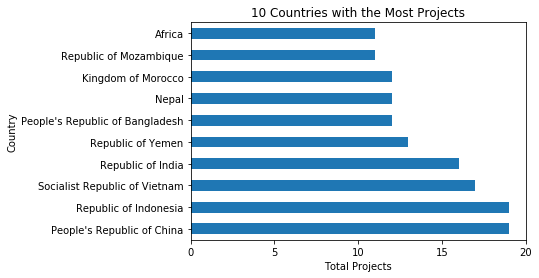

In [5]:
#graph results
ax = df.plot(kind='barh', legend=False, xticks=[0,5,10,15,20])
ax.set_xlabel('Total Projects')
ax.set_title('10 Countries with the Most Projects')

## Exercise #2: 
### Find the top 10 major project themes (using column 'mjtheme_namecode')

In [6]:
#extract necessary fields from data list for exercise 2
df = json_normalize(data, 'mjtheme_namecode')

#replace blank name fields with NaN, drop columns w/o names (normally I would populate the names  but that is part of question #3)
df['name'].replace('', np.nan, inplace=True)
df.dropna(inplace=True, how='any')

#group by code, name and get size (count)
df = df.groupby(['code', 'name']).size().sort_values(ascending=False).head(10).to_frame()

#rename columns to make presentation easier
df.rename(columns={df.columns[0]:'Count of Project Theme'}, inplace=True)

#housekeeping
df.reset_index(inplace=True)
df.set_index('name', inplace=True)
del df['code']

df

,Count of Project Theme
name,
Environment and natural resources management,223
Rural development,202
Human development,197
Public sector governance,184
Social protection and risk management,158
Financial and private sector development,130
Social dev/gender/inclusion,119
Trade and integration,72
Urban development,47


Text(0.5, 1.0, 'Total Projects by Theme')

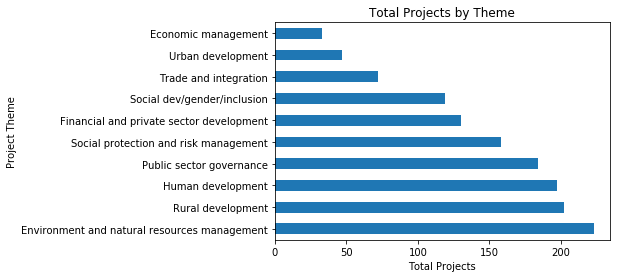

In [7]:
#graph results
ax = df.plot(kind='barh', legend=False)
ax.set_xlabel('Total Projects')
ax.set_ylabel('Project Theme')
ax.set_title('Total Projects by Theme')

## Exercise #3: 
## In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
#extract necessary fields from data list for exercise 3
df = json_normalize(data, 'mjtheme_namecode')

#replace the blanks name fields with NaN and convert code to int (both make data easier to work with)
df['name'].replace('', np.nan, inplace=True)
df['code'] = df['code'].astype(int)

#take a copy of df for purpose of creating lookup for name (via code)
df_name_key = df.copy(deep=True)

#drop missing values (these are ultimately the values we will be updating - e.g. filling in blank name)
df_name_key.dropna(how='any', inplace=True)

#we only want one entry per code/name pair
df_name_key.drop_duplicates(inplace=True)

#housekeeping
df_name_key.sort_values('code',inplace=True)
df_name_key.set_index('code', inplace=True)

#make final lookup series.  nclass_lookup is a list of names in code order
nclass_lookup = df_name_key['name']

#get a list of all the records with null name (these are the records we will be updating)
nulls = df.loc[df.name.isnull(), 'code']

#update df based on nclass_lookup
df.loc[df.name.isnull(), 'name'] = nclass_lookup.loc[nulls].values

#dataframe with missing values populated
df.head(10)

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [9]:
#group by code, name and get size (count)
df = df.groupby(['code', 'name']).size().sort_values(ascending=False).head(10).to_frame()

#rename columns to make presentation easier
df.rename(columns={df.columns[0]:'Count of Project Theme'}, inplace=True)

#housekeeping
df.reset_index(inplace=True)
df.set_index('name', inplace=True)
del df['code']

#dataframe with missing values populated and summarized
df.head(10)

,Count of Project Theme
name,
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50


Text(0.5, 1.0, 'Total Projects by Theme')

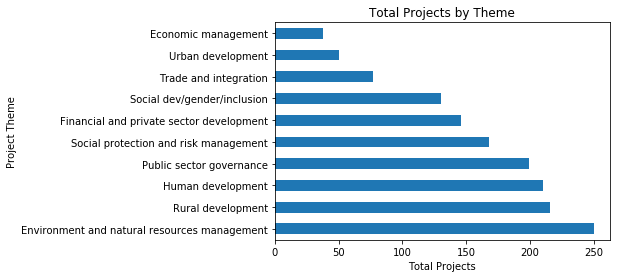

In [10]:
#graphed results (same as #2 but data now represents previous missing data as well)
ax = df.plot(kind='barh', legend=False)
ax.set_xlabel('Total Projects')
ax.set_ylabel('Project Theme')
ax.set_title('Total Projects by Theme')